---
title: Networks and NetworkX
date: '2024-09-26'
description: This notebook is an introduction to basic network analysis in python.
categories:
  - python
  - network analysis
format:
  html: default
  ipynb:
    jupyter:
      kernelspec:
        display_name: Python
        language: python3
        name: python3
jupyter:
  jupytext:
    text_representation:
      extension: .qmd
      format_name: quarto
      format_version: '1.0'
      jupytext_version: 1.16.1
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3
---

This notebook introduces key concepts in network analysis pertaining to archeology and provides a hands-on tutorial to using the NetworkX Python library.

## 0. Prerequisites

- Read through and follow the instructions in the pre-reading 
  - Have python and jupyter set up on your device
  - Have created the `networks` environment
- If you have not done this, see the pre-reading

## 1. What is Network analysis?

**Network Analysis** is a set of techniques used to study the structure and dynamics of networks. **Networks** are collections of objects/locations/entities (called nodes) connected by relationships (called edges). Network analysis has applications in various fields, including sociology, biology, computer science, and more.

 <figure>
  <img src="images/networks.png" alt="Network" style="width:80%">
  <figcaption>Regional networks of ceramic similarity
across time in the greater Arizona/New Mexico area of the US (From Mills et al. 2013, Fig. 2) </figcaption>
</figure> 

**A motivating example: Understanding social networks in the prehistoric southwest**

Mills et Al. Use social network analysis to analyze how social networks changed during the late pre-Hispanic period (A.D. 1200–1450) in the US Southwest. The authors used network analysis and geographic information systems to explore network dynamics across a 250-year period, focusing on how large-scale demographic changes like migration. Using a comprehensive dataset of over 4.3 million ceramic artifacts and 4,800 obsidian artifacts, the authors show how social networks "changed during a particularly dynamic period in the Southwest", and the "degree to which spatial proximity predicts social connectedness based on material culture from archaeological settlements". 

- The study revealed a shift in eigenvector centrality — a measure of a settlement's importance in the network—from northern to southern regions in the US southwest.
- One surprising result was the persistence of long-distance social ties, sometimes exceeding 250 km, even though movement was primarily pedestrian. These connections intensified after migration events, "these long-distance connections were highest in the century following a period of massive demographic change, including depopulation, migration, and settlement coalescence". 
- By the late 14th and early 15th centuries, the southern networks, though highly connected, became unstable and collapsed. In contrast, smaller, more isolated networks in the northern Southwest, particularly at Hopi and Zuni, persisted and are still present today.

**Network science in archeology** is traditional network science used under an archeological context. Per Brighmans and Peeples, archeological network science falls within the discipline of archeology and is not a discipline of it's own: "network science applied to archaeological research is a subset of archaeological research: it does not happen in isolation, it is not immune to the limitations of archaeological data nor does it replace archaeological theory" (2023).

 <figure>
  <img src="images/abstraction_of_NA_research_process.png" alt="Archeological network science research process" style="width:80%">
  <figcaption>Archeological network research process. (Brighmans and Peeples, 2023) </figcaption>
</figure> 

### 1.1 Key terms

<div style="display: flex; align-items: center;">
  <figure style="margin: 0;">
    <img src="images/example_graph.png" alt="Nodes in a network." width="700" height="300">
    <figcaption style="text-align: center;">An example of a graph with nodes and edges.</figcaption>
  </figure>
  <div style="padding-left: 20px;">
    <p><b>Node:</b> A node is a representation of an individual entity or actor in a network. In different contexts, nodes can be people, organizations, cities, or any other unit of analysis.</p>
    <p><b>Edge:</b>An edge represents the relationship or connection between two nodes. Edges can be directed (having a specific direction from one node to another) or undirected (no direction, implying a mutual relationship)</p>
  </div>
</div>


<div style="display: flex; align-items: center;">
  <figure style="margin: 0;">
    <img src="images/example_graph_2.png" alt="Nodes in a network with degree." width="700" height="300">
    <figcaption style="text-align: center;">An example of a network with nodes colored by degree.</figcaption>
  </figure>
  <div style="padding-left: 20px;">
    <p><b>Degree:</b>  The degree of a node is the number of edges connected to it. In directed networks, this can be further divided into in-degree (number of incoming edges) and out-degree (number of outgoing edges).</p>
  </div>
</div>

<div style="display: flex; align-items: center;">
  <figure style="margin: 0;">
    <img src="images/example_graph_dir.png" alt="Nodes in a network with degree." width="700" height="300">
    <figcaption style="text-align: center;">An example of a network with nodes colored by degree.</figcaption>
  </figure>
  <div style="padding-left: 20px;">
    <p>The network above is an example of a <b>Undirected graph</b>, a graph with no direction. This means that if there is a connection between examples node A and node B, it is bidirectional— A is connected to B, and B is connected to A.</p>
    <p>The example to the left is a <b>directed graph</b>: the edges between nodes have a specific direction. This means that if there is an edge from node A to node B, it does not imply there is an edge from B to A unless explicitly stated.</p>
  </div>
</div>

<div style="display: flex; align-items: center;">
  <figure style="margin: 0;">
    <img src="images/example_density.png" alt="Nodes in a network with degree." width="700" height="300">
    <figcaption style="text-align: center;">An example of a network with nodes colored by degree.</figcaption>
  </figure>
  <div style="padding-left: 20px;">
    <p><b>Density:</b>  Density is a measure that indicates how closely connected the nodes in a network are. Specifically, it refers to the ratio of the number of actual edges in the network to the maximum possible number of edges between nodes.</p>
  </div>
</div>

<div style="display: flex; align-items: center;">
  <figure style="margin: 0;">
    <img src="images/example_graph_closeness_centrality.png" alt="Nodes in a network with degree." width="700" height="300">
    <figcaption style="text-align: center;">An example of a network with nodes colored by degree.</figcaption>
  </figure>
  <div style="padding-left: 20px;">
    <p><b>Centrality:</b> Centrality measures the importance, influence, or prominence of nodes (entities) within a network. In other words, the centrality of a node tells us how "important" a node is to the aggregate network. There are many different kinds of centrality, but the four most well-known ones are degree, betweenness, closeness, and eigenvector centrality. This notebook will primarily focus on the first three. 
  </div>
</div>

### 1.2 NetworkX

NetworkX is a python library that is used for the creation, manipulation, and visualization of complex networks. It provides tools to work with both undirected and directed networks, perform network-related calculations, and visualize the results. 


#### 1.2.1 Importing NetworkX

We can import NetworkX using the `import` command. At the same time, we'll also import the `matplotlib.pyplot` library, for plotting graphs. Additionally, we'll import `pandas` for basic data wrangling, and `numpy` for math. The `as` command allows us to use networkx commands without needing to type out `networkx` each time. Additionally, we'll import the `community_louvain` package for the louvain clustering algorithm. Along with some other libraries for our code to function. 


In [1]:
import matplotlib.pyplot as plt #allows us to call the matplotlib.pyplot library as 'plt'
import matplotlib.patches as mpatches #imports mpatches matplotlib subpackage 
import networkx as nx #allows us to call the networkx library as 'nx'
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import community as community_louvain
import random
import contextily as ctx

In [ ]:
import os

os.system("wget ")
os.system("unzip ")

csv_path = (" ")

#### 1.2.2 Creating simple networks using NetworkX

We'll start by creating a simple graph:

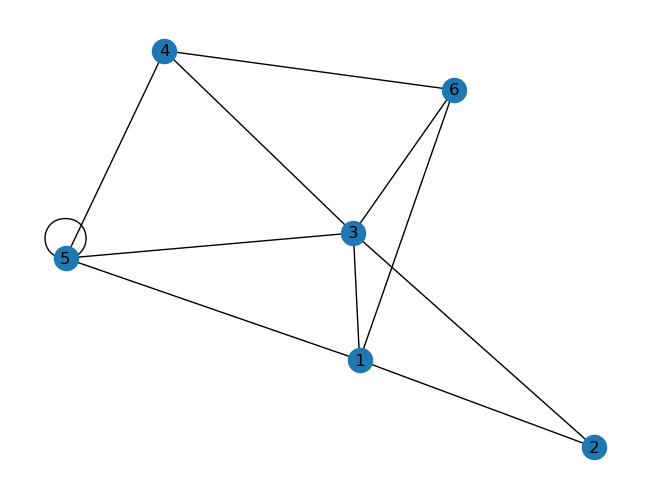

In [2]:
G = nx.Graph() #creates an empty network graph

nodes = (1, 2, 3, 4, 5, 6) #our nodes, labeled 1,2,3,4,5,6.
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)]
        #the connections between our nodes are stored in an array, containing pairs of numbers called tuples.
G.add_edges_from(edges) #the `add_edges_from()` command adds edges to the network
G.add_nodes_from(nodes) #the `add_nodes_from()` command adds nodes to the network

nx.draw(G, with_labels = True) #renders the graph in the notebook
        #the `with_labels = True` argument specifies that we want labels on the nodes.

Let's create a directed graph using `nx.DiGraph()`. We'll also set our node positions using a seed: this will ensure that each time the nodes are rendered they hold the same position on the graph. You can set the seed to any number. 

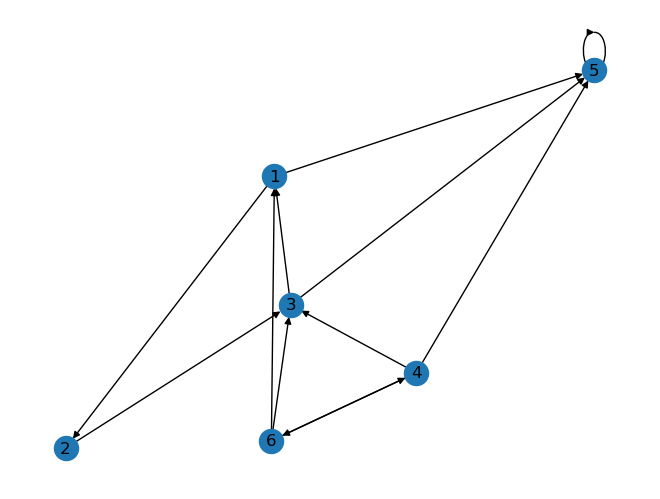

In [3]:
G = nx.DiGraph() #creates an empty directed graph object
nodes = (1, 2, 3, 4, 5, 6) 
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)]
G.add_edges_from(edges) 
G.add_nodes_from(nodes) 

position = nx.spring_layout(G, seed=100)

nx.draw(G, pos = position, with_labels = True) # `pos` argument assigns a position to each node

### 1.3 Creating Random Graphs

Instead of creating a graph with predetermined positions of nodes and edges we can also generate a random graph with a set amount of nodes and edges. Below you can change the amount of nodes and edges by changing `n` and `d` which correspond to the number of nodes and the  degree (number of edges) that each node has. 

The first most basic command we will use is the  `nx.random_regular_graph` command. Which generates a random regular graph. 

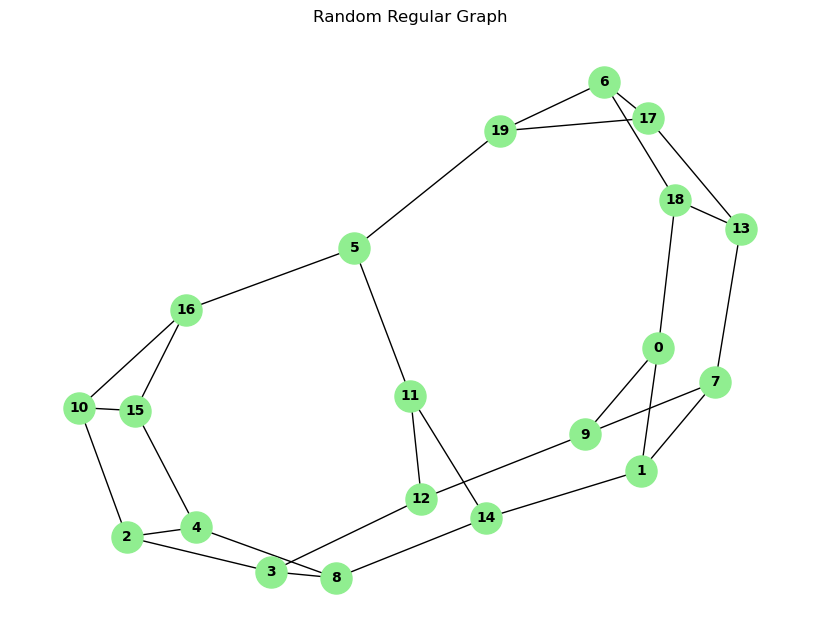

Number of nodes: 20
Number of edges: 30
Degree of each node: 3


In [4]:
# Set a seed for reproducibility
random.seed(42)

# Parameters
n = 20  # number of nodes
d = 3   # degree of each node

# Generate the random regular graph
rr_graph = nx.random_regular_graph(d, n)

# Visualize the graph, you can change the size, color, font and node size. 
plt.figure(figsize=(8, 6)) 
nx.draw(rr_graph, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold')
plt.title("Random Regular Graph")
plt.show()

# Print some basic information about the graph
print(f"Number of nodes: {rr_graph.number_of_nodes()}")
print(f"Number of edges: {rr_graph.number_of_edges()}")
print(f"Degree of each node: {d}")

Another option is using the Erdős-Rényi model which can be accessed using the `nx.erdos_renyi_graph(n, p)` command. This command has two inputs n and p. N is the number of nodes and p is the probability of edge creation to each node. 

In [ ]:
# Set a seed for reproducibility
random.seed(43)

# Parameters
n = 20  # number of nodes
p = 0.2  # probability of edge creation

# Generate the Erdős-Rényi random graph
er_graph = nx.erdos_renyi_graph(n, p)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(er_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Erdős-Rényi Random Graph")
plt.show()

# Print some basic information about the graph
print(f"Number of nodes: {er_graph.number_of_nodes()}")
print(f"Number of edges: {er_graph.number_of_edges()}")
print(f"Average degree: {sum(dict(er_graph.degree()).values()) / n:.2f}")

There are more commands in NetworkX to generate random graphs, but the two above demonstrate two common methods of random graph generations. The first being a set ammount of nodes and edges and the second being a set amount of nodes and then a probability of edge creation between them. 

## 2. Degrees, Density and Weights

### 2.1 Degrees  

The **degree** of a node is the number of edges that are connected to a node. The degree of a node $N$ is denoted as $deg(N)$. The maximum degree of a network $G$ is denoted by $\Delta(G)$ and is the degree of the node with the highest degree in the network. Conversely, the minimum degree is denoted as $\delta(G)$. 

- If a node on a graph with $n$ nodes has a degree $n-1$ it is called a *dominating vertex*. Not every graph has a dominating vertex. 

We can see the degree of each node by running `dict(G.degree())`. This create a dictionary of key-value pairs for our network, where each key is the name of the node and the value is it's respective degree. 

In [ ]:
degrees = dict(G.degree())

If we want to see the degree of node $n$, we can do so by running `print(degrees[n])`. For instance:

In [ ]:
print(degrees[1])

Let's color the nodes of our graph based on their degree. We'll create a function called `get_node_colors` which takes in the degree dictionary of each node and returns a color. We'll then create a for-loop that iterates over each nodes in the list of nodes, gets the color of each node using the `get_node_colors` function we defined earlier, and appends it to an empty list called `color_map`. 

In [ ]:
degrees = dict(G.degree())
nodes = list(G.nodes())

def get_node_colors(degree):
    if degree in [1, 2]:
        return 'blue'
    elif degree in [3, 4]:
        return 'green'
    elif degree in [5, 6]:
        return 'yellow'
    else:
        return 'red' 

color_map = [] #`color_map` is an empty list

for node in nodes:
  color = get_node_colors(degrees[node]) # get color of current node using node_colors according to degree of node
  color_map.append(color) # appends color of each node to color_map for each node in nodes

print(degrees)
print(nodes)
print(color_map)

The $n$-th entry in `color_map` corresponds to the $n$-th node in `nodes`. For instance, `color_map[0]` returns the color of the first node (1).

In [ ]:
color_map[0]

We can now color the nodes of our graph, using the color map we defined above. The `node_color` argument takes in an array or list of colors that it uses to color each node.

In [ ]:
G = nx.DiGraph() # creates an empty directed graph object
nodes = (1, 2, 3, 4, 5, 6) 
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)]
G.add_edges_from(edges) 
G.add_nodes_from(nodes) 

position = nx.spring_layout(G, seed=100)

nx.draw(G, pos = position, node_color=color_map, with_labels=True) 
    # node_color argument colors the nodes based on a given list or array of colors, 
    # with the first color corresponding to the first node, second to the second node, etc.

Let's also add a legend to our graph, which gives information about the meaning of each color. We'll do this using the `mpatches` subpackage we imported earlier. 

In [ ]:
blue_patch = mpatches.Patch(color='blue', label='1-2 edges') 
green_patch = mpatches.Patch(color='green', label='3-4 edges')
yellow_patch = mpatches.Patch(color='yellow', label='5-6 edges')
plt.legend(handles=[blue_patch, green_patch, yellow_patch]) #adds legend to the plot

nx.draw(G, pos = position, node_color=color_map, with_labels=True)

### 2.2 Density

Density is defined as: 
    $$Density=\frac{Number\:of\:Possible\:Edges}{Number\:of\:Actual\: Edges}​$$
 
 In an undirected graph, the total number of edges is $\frac{V\times(V-1)}{2}$, where V is the total number of nodes.
 In a directed graph, the total number of edges is $V\times(V-1)$, because a connection between point A and point B can either be *from* point A *to* point B, or *to* point A *from* point B (hence multiplying by 2). 
 
 - Note that self-loops (edges from and to the same node) are counted in the total number of edges but not in the maximum number of edges so graphs can have a density greater than 1.

 The formula for undirected graph density is thus:
 $$\frac{2E}{V(V-1)}$$

 And for directed graphs, it is:
 $$\frac{E}{V(V-1)}$$

 Where $E$ is the number of edges in our graph and $V$ is the number of nodes.

We can calculate the density of our graph:

In [ ]:
nx.density(G)

### 2.3 Weights

Often times, you may end up working with *weighted* graphs: for instance, these weights could correspond to popularity of roads in road networks, or the number of artifacts in common between sites. 

We'll standardize our weights to be between 1 and 2 (as otherwise the results are messy). We'll do this using a for-loop, like we did with the degrees. 

In [ ]:
G_weights = nx.DiGraph() #creating a new graph object called G_weights
nodes = [1, 2, 3, 4, 5, 6]
edges = [(1, 2), (2, 3), (3, 1), (1,5), (3,5), (4, 5), (4, 6), (6, 1), (6, 3), (6,4), (4, 3), (5, 5), (3, 5)]
weights = [100, 50, 75, 50, 60, 100, 100, 75, 40, 50, 50, 100, 100] #add list of weights
G_weights.add_edges_from(edges) 
G_weights.add_nodes_from(nodes) 

adjusted_weights = []
for weight in weights:
    adjusted_weight = 1+ (max(weights)-weight)/(max(weights)-min(weights)) #standardizes weights to be between 1 and 2
    adjusted_weights.append(adjusted_weight)

position = nx.spring_layout(G, seed=100)

print(adjusted_weights)
nx.draw(G_weights, pos = position, width = adjusted_weights, with_labels = True) 
    # width argument take in a list or array of numbers corresponding to weights

This is great, but the results aren't very clear. Let's add a color gradient to the edges to represent different weights. 

In [ ]:
norm = plt.Normalize(min(weights), max(weights), clip=False) 
    #`plot.normalizes` normalizes the weights such that they are evenly distributed across the gradient spectrum
edge_colors = plt.cm.Greys(norm(weights)) 
    # norm(weights) normalizes the weights 
    # plot.cm.greys() assigns the weights to color values
    # edge_colors is a multidimensional array of RGBA color values corresponding to each edge

fig, ax = plt.subplots() #explicitly specifying figure and axes in order to create a color bar

nx.draw(G_weights, pos=position, edge_color=edge_colors, width=adjusted_weights, with_labels=True, ax=ax) 
    #ax = ax argument needed for color bar

# Adding color bar
sm = plt.cm.ScalarMappable(cmap="Greys", norm=norm) # creates a scalarmappable object which acts 
                                                    # as a bridge between the numerical weight values and color map
plt.colorbar(sm, ax=ax) #plotting color bar

### 3. Adjacency matrices 

An **Adjacency matrix** is a method of representing graphs in matrix form. In an adjacency matrix, the rows and columns correspond to the vertices (or nodes) of the graph. The entries of the matrix indicate whether pairs of vertices are adjacent or not in the graph. Normally, a value of 1 is assigned to entries where an edge is present, and 0 is assigned to entries where an edge is not. For a weighed graph, the weight of the edge is represented as a numerical value for entries where an edge is present.

We can convert our simple graph to an adjacency matrix:

In [ ]:
nx.to_pandas_adjacency(G)

If we want to use our weighted graph, we can use the following code:

In [ ]:
# len(edges) returns the total number of entries in the list of edges.
# range(len(edges)): This generates a sequence of numbers from 0 to n-1 where n is len(edges), 
    #so the for-loop will run n times with i taking each value in that range, one at a time.

for i in range(len(edges)):
    edge = edges[i] # retrieves the edge at position i in the list of edges
    weight = weights[i] # retrieves the weight at position i in the list of weights
    G_weights.add_edge(edge[0], edge[1], weight=weight) # adds an edge with a weight to the graph 
    
nx.to_pandas_adjacency(G_weights, nodelist=nodes, weight='weight') #converts to pandas adjacency matrix with the weights in place

We can visualize our matrix using the code below. Note that instead of using `nx.to_pandas_adjacency` we use `nx.to_numpy_array`: this allows us to store the matrix in the form of an array.

In [ ]:
adj_matrix = nx.to_numpy_array(G_weights, nodelist=nodes, weight='weight')


plt.figure(figsize=(8, 8)) #displays data as an image on a 2d raster; in our case, a numpy array

plt.imshow(adj_matrix, cmap='gray_r')

for i in range(adj_matrix.shape[0]): #loops through each row of the matrix
    for j in range(adj_matrix.shape[1]): #for each row, loops through each column of the matrix
        plt.text(j, i, int(adj_matrix[i, j]),
                 ha='center', va='center', color='red', size=30) #prints the value at that position in the matrix on the graph

plt.title('Adjacency Matrix Visualization')
plt.xlabel('Node Index')
plt.ylabel('Node Index')

## 4. Working with archeological datasets

The ICRATES database of tablewares in the Roman East is a dataset of red slip tablewares between the late Hellenistic and late Roman periods in the east Mediterranean (Bes, 2015). The dataset is in fact comprised of two datasets: the first is a dataset of nodes with their respected connections, as well as weights for each edge and other information. The second dataset contains geographical coordinates for each node in the network. We will use these coordinates to add a geospacial component to our analysis, by placing each node in it's respective geographical coordinates and adding a map overlay. We begin by demonstrating how to import and visualize the dataset in python, and then introduce various centrality and connectivity measures.

Importantly, the nodes in the first dataset are categorized by time period. We will initially focus on a singular time period, but will showcase how to graph multiple time frames towards the end of the notebook.

### 4.1 Importing datasets in Python

We can import datasets in python using pandas' `read_` function. In our case, both network and location datasets are stored in excel files. We can thus use the `read_excel` function.

In [ ]:
df_edges = pd.read_excel("vistorian_network.xls") #loading in dataset

G_directed = nx.from_pandas_edgelist(df_edges, source="SOURCE_LOCATION", target="TARGET_LOCATION", create_using=nx.DiGraph()) #creating a graph object
G = nx.from_pandas_edgelist(df_edges, source="SOURCE_LOCATION", target="TARGET_LOCATION")

### 4.2 Adding a geospacial component to our graph

We could just plot this network right away, but this wouldn't convey good information, as the nodes in our dataset represent real places. Instead, let's bind each node to it's respective geographical location using the `geopandas` library.

In [ ]:
df_pos = pd.read_excel("vistorian_locations.xls", index_col=0)
 # loading in coordinates of nodes; index_col specifies that the first column (with index 0) in the Excel sheet should be used as the row labels for the DataFrame

gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326') 
 # creates a geodataframe, a special dataframe from the geopandas library for storing geographic datapoints.
    # crs='EPSG:4326' argument defines the Coordinate Reference System for the geometric data: in our case, the location dataset uses the WGS84 coordinate system

gdf_pos = gdf_pos.to_crs('EPSG:3857') #reprojecting to web mercator for the world map overlay to accurately show up on our graph

In [ ]:
gdf_pos #returns a GeoDataframe of all the nodes and their respective positions

In [ ]:
gdf_pos.loc['Abdera'] 
# the loc accessor in pandas (and by extension, GeoPandas, which extends pandas) is used to access a group of rows and columns by labels. This will be useful for our next step.

Great! we now have a GeoDataFrame of each node in our graph, with their respective position. However, networkX's requires a dictionary of node-location pairs for properly mapping each node. Let's create a new dictionary using the dataframe above. 

In [ ]:
positions = {} #empty dictionary which will contain the positions of each node
for location in gdf_pos.index: # iterates over each index in the gdf_pos GeoDataFrame. The index in gdf_pos is the names of all our nodes.
    x = gdf_pos.loc[location].geometry.x  # For each location, this line accesses the `geometry` column to retrieve the x-coordinate (latitude).
    y = gdf_pos.loc[location].geometry.y  # Same thing but for y-coordinate (longitude)
    positions[location] = (x, y)  # Adding to the dictionary with the location as the key

Now we have a dictionary containing each node, and it's geographic position. We can now plot our graph!

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))# Creating subplots so that we can overlay the network and the map
gdf_pos.plot(ax=ax, alpha=0)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)# Adding the basemap: we are using CartoDB for this

# Drawing the network edges and nodes, as usual
nx.draw_networkx_edges(G, pos=positions, ax=ax, alpha=0.05)
nx.draw_networkx_nodes(G, pos=positions, ax=ax, node_size=20, node_color="red", edgecolors="black", alpha=0.8)

We can focus on a specific geographical area by specifying longitudonal and latitudonal limits and filtering the locations dataset for locations that fall within those limits. From now on, let's focus our analysis on the area surrounding the Aegean Sea.

In [ ]:
gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326')
gdf_pos = gdf_pos.to_crs('EPSG:3857')

# We create a "bonding box" which contains the outer limits of our positions.
min_x, min_y = 1858948, 4055442
max_x, max_y = 3336323, 5175704

gdf_pos_filtered = gdf_pos.cx[min_x:max_x, min_y:max_y] # Filtering the GeoDataFrame to include only points within the bounding box
filtered_nodes = gdf_pos_filtered.index.tolist()

G_sub = G.subgraph(filtered_nodes) # Create a subgraph from the original graph G using only the filtered nodes

# Prepare positions for the filtered subgraph
positions_filtered = {}
for loc in gdf_pos_filtered.index:
    x = gdf_pos_filtered.loc[loc].geometry.x
    y = gdf_pos_filtered.loc[loc].geometry.y
    positions_filtered[loc] = (x, y)

# Plotting the filtered subgraph
fig, ax = plt.subplots(figsize=(9, 9))
gdf_pos_filtered.plot(ax=ax, alpha=0)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

nx.draw_networkx_edges(G_sub, pos=positions_filtered, ax=ax, alpha=0.1)
nx.draw_networkx_nodes(G_sub, pos=positions_filtered, ax=ax, node_size=60, node_color="red", edgecolors="black", alpha=0.8)

plt.show()

### 4.3 Working with weighed graphs

If we print the df_edges dataframe, we see that it contains `WEIGHT` and `TYPE` columns, that correspond to each edge in the network. The `TYPE` category corresponds to the type of pottery linking two sites, and the `WEIGHT` cateogry corresponds to the relative importance of each edge. 

In [ ]:
print(df_edges)

print(max(df_edges['WEIGHT']))
print(min(df_edges['WEIGHT']))

print(df_edges['TYPE'].unique())

We can see that the `WEIGHT` cateory has values that range from 0 to 17, and the `TYPE` categories has two pottery types: `ESB`, `ESC`, as well as undefined pottery types (NaN). Let's change the *width* of each edge in the network to reflect it's weight, and the *color* of each edge to reflect it's type. 

This is made slightly difficult as we are working with a subgraph and the `TYPE` and `WIDTH` categories contain entries for the full graph.

In [ ]:
df_edges

In [ ]:
G_sub_weighted = G.subgraph(filtered_nodes)

# creating a new column called `edge_tuple` which contains tuples of the source and target locations.
# We such a column for filtering the weight and type categories to only contain edges within G_sub_weighted and not G.
edge_tuples = []
for index, row in df_edges.iterrows(): #Iterating over the rows of df_edges using iterrows() 
    edge_tuple = (row['SOURCE_LOCATION'], row['TARGET_LOCATION'])  # Creating a tuple from the 'SOURCE_LOCATION`` and 'TARGET_LOCATION' columns
    edge_tuples.append(edge_tuple)  # Appending each tuple to the list
df_edges['edge_tuple'] = edge_tuples #  appending edge_tuples to df_edges 

subgraph_edges = list(G_sub_weighted.edges()) #listing all the edges in the subgraph
filtered_edges = df_edges[df_edges['edge_tuple'].isin(subgraph_edges)] #filtering df_edges to only contain edges in the subgraph
filtered_edges.reset_index(drop=True, inplace=True) #the index gets all sliced up when filtering rows, this makes it normal again

edge_colors = [] #create an empty set which contains the colors of the artifacts ESB, ESC
for type in filtered_edges['TYPE']: 
    if type == 'ESB':
        edge_colors.append('maroon')
    elif type == 'ESC':
        edge_colors.append('navy')
    else:
        edge_colors.append('plum') 

# Set the weights of the edges
weights = filtered_edges['WEIGHT']
adjusted_weights = []
for weight in weights:
    adjusted_weight = 0.1 + ((max(weights)- min(weights))/20)  
    adjusted_weights.append(adjusted_weight)

fig, ax = plt.subplots(figsize=(9, 9))
gdf_pos_filtered.plot(ax=ax, alpha=0)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

#Plot the network on the graph
nx.draw_networkx_nodes(G_sub_weighted, pos=positions_filtered, ax=ax, node_size=60, node_color="red", edgecolors="black", alpha=0.8)
nx.draw_networkx_edges(G_sub_weighted, pos=positions_filtered, ax=ax, width=adjusted_weights, edge_color=edge_colors, alpha=0.3)

#Show our graph
patch_maroon = mpatches.Patch(color='maroon', label='ESB') 
patch_navy = mpatches.Patch(color='navy', label='ESC') 
plt.legend(handles=[patch_maroon, patch_navy])
plt.show()

#Print information about the types of edges
print(adjusted_weights)
print(filtered_edges)

This works, but the weightings are hard to see. One alternative is to filter the subgraph by weight, and graph the different weights side-by-side:

In [ ]:
# creating a function that creates a list of colors, then apply the function to each subset of edges filtered by weight
def get_edge_colors(filtered_edges):
    edge_colors = []
    for type in filtered_edges['TYPE']: 
        if type == 'ESB':
            edge_colors.append('maroon')
        elif type == 'ESC':
            edge_colors.append('navy')
        else:
            edge_colors.append('green')
    return edge_colors

# Filtering the edges by weight
filtered_edges_w1 = filtered_edges[filtered_edges['WEIGHT'] == 1]
filtered_edges_w2 = filtered_edges[filtered_edges['WEIGHT'] == 2]
filtered_edges_w3 = filtered_edges[filtered_edges['WEIGHT'] == 3]

# applying the get_edge_colors function on each subset of edges
edge_colors_w1 = get_edge_colors(filtered_edges_w1)
edge_colors_w2 = get_edge_colors(filtered_edges_w2)
edge_colors_w3 = get_edge_colors(filtered_edges_w3)

fig, axes = plt.subplots(1, 3, figsize=(18, 6)) #creating a plot; 1, 3 creates 3 subplots spaced horizontally

# Graph 1: weight = 1
axes[0].set_title('Weight 1') #axes[n] specifies which plot to plot the graph in: axes[0] is plot 1.

gdf_pos_filtered.plot(ax=axes[0], alpha=0)
ctx.add_basemap(axes[0], source=ctx.providers.CartoDB.Positron)

nx.draw_networkx_nodes(G_sub_weighted, pos=positions_filtered, ax=axes[0], node_size=60, node_color="red", edgecolors="black", alpha=0.8)
nx.draw_networkx_edges(G_sub_weighted, pos=positions_filtered, ax=axes[0], edgelist=list(filtered_edges_w1['edge_tuple']),
                       edge_color=edge_colors_w1, alpha=0.4) #`list(filtered_edges_w1['edge_tuple'])` extracts the edge_tuple column and converts the entries into a list

# Graph 2: weight = 2
axes[1].set_title('Weight 2')
gdf_pos_filtered.plot(ax=axes[1], alpha=0)
ctx.add_basemap(axes[1], source=ctx.providers.CartoDB.Positron)
nx.draw_networkx_nodes(G_sub_weighted, pos=positions_filtered, ax=axes[1], node_size=60, node_color="red", edgecolors="black", alpha=0.8)
nx.draw_networkx_edges(G_sub_weighted, pos=positions_filtered, ax=axes[1], edgelist=list(filtered_edges_w2['edge_tuple']),
                    edge_color=edge_colors_w2, alpha=0.4)

# Graph 3: weight = 3
axes[2].set_title('Weight 3')
gdf_pos_filtered.plot(ax=axes[2], alpha=0)
ctx.add_basemap(axes[2], source=ctx.providers.CartoDB.Positron)
nx.draw_networkx_nodes(G_sub_weighted, pos=positions_filtered, ax=axes[2], node_size=60, node_color="red", edgecolors="black", alpha=0.8)
nx.draw_networkx_edges(G_sub_weighted, pos=positions_filtered, ax=axes[2], edgelist=list(filtered_edges_w3['edge_tuple']),
                       edge_color=edge_colors_w3, alpha=0.4)

patch_maroon = mpatches.Patch(color='maroon', label='ESB') 
patch_navy = mpatches.Patch(color='navy', label='ESC') 
axes[0].legend(handles=[patch_maroon, patch_navy], loc='upper left')
axes[1].legend(handles=[patch_maroon, patch_navy], loc='upper left')
axes[2].legend(handles=[patch_maroon, patch_navy], loc='upper left')
plt.show()

## 5. Measures of Centrality

**Centrality** is defined as the set of metrics used to determine the importance or influence of a particular node within a network. It helps to identify which nodes hold strategic significance in terms of connectivity, information flow, or influence over other nodes. Various centrality metrics, such as degree, betweenness, and eigenvector centrality, provide different perspectives on the role each node plays within the network's overall structure.

### 5.1 Network Distance and Eccentricity 

Before talking about centrality, we first need to talk a bit about *distance*. **Distance**, also known as **Geodesic distance**, is defined as the number of edges traversed by the shortest path between two nodes.
- The distance between a node and itself is 0.
- The distance between a node and a node for which no shortest path exists (such as a node that is disconnected from other nodes) is $\infty$.
- The distance between a node and it's neighbor is 1.

A node's **eccentricity** is the maximum distance from said node to all other nodes in the graph. For instance, in the following network, the eccentricity of node $A$ is 2, but the eccentricity of node $B$ is 1. 

In [ ]:
nodes = ("A","B", "C")
edges = [("A","B"), ("B", "C")]

G_example = nx.Graph()
G_example.add_edges_from(edges)
G_example.add_nodes_from(nodes)

color_map = ["salmon", "lightblue", "salmon"]


red_patch = mpatches.Patch(color='salmon', label='eccentricity = 1') 
blue_patch = mpatches.Patch(color='lightblue', label='eccentricity = 2') 
plt.legend(handles=[blue_patch, red_patch])

nx.draw(G_example, node_color=color_map, with_labels=True)

If we color the nodes of our Aegean sea pottery network by eccentricity, we see an interesting result:

In [ ]:
#Bring in our data to be used
gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326')
gdf_pos = gdf_pos.to_crs('EPSG:3857')

#Set a bounding box on our data
min_x, min_y = 1858948, 4055442
max_x, max_y = 3336323, 5175704

#Use the bounding box on our data
gdf_pos_filtered = gdf_pos.cx[min_x:max_x, min_y:max_y] 
filtered_nodes = gdf_pos_filtered.index.tolist()

G_sub_eccentricity = G.subgraph(filtered_nodes) 

eccentricities = nx.eccentricity(G_sub_eccentricity) #calculating eccentricities
eccentricities_array = np.array(list(eccentricities.values()))

#Set a colour map for different values of eccentricity in our network
color_map = []
for eccentricity in eccentricities_array:
    if eccentricity == 1:
        color_map.append("palegreen")
    elif eccentricity == 2:
        color_map.append("slateblue")
    elif eccenticity == 3:
        color_map.append("orange")
    else:
        color_map.append("grey")

#Filter oyur graph
positions_filtered = {}
for loc in gdf_pos_filtered.index:
    x = gdf_pos_filtered.loc[loc].geometry.x
    y = gdf_pos_filtered.loc[loc].geometry.y
    positions_filtered[loc] = (x, y)

fig, ax = plt.subplots(figsize=(9, 9))
gdf_pos_filtered.plot(ax=ax, alpha=0)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

#Draw our graph with different colours for eccentricity
nx.draw_networkx_edges(G_sub_eccentricity, pos=positions_filtered, ax=ax, alpha=0.1)
nx.draw_networkx_nodes(G_sub_eccentricity, pos=positions_filtered, node_color=color_map, ax=ax, node_size=60, edgecolors="black", alpha=0.8)

patch = mpatches.Patch(color='slateblue', label='eccentricity = 2') 
plt.legend(handles=[patch])

#show the graph
plt.show()

All nodes are at most 2 edges away from every other other node!

### 5.2 Degree Centrality

Degree centrality is simple: Recall that the **degree** of a node is the number of nodes directly connected to it. In degree centrality, the more adjacent nodes, the more important the network is considered to be. Degree centrality is used primarily in social networks, where nodes with higher degrees are commonly major channels of information. A high degree means a node has many direct ties with other nodes, and has better access to resources within the network.

Note that the networkX `nx.degree_centrality()` function normalizes each node's degree by dividing by the maximum possible degree in the network. Therefore for graphs without self-loops (such as the one we are working with) the degree centrality is always $\leq 1$. For educational purposes, we un-normalize the degree values, but this is not common practice. 

We can calculate the degree centrality of all our nodes in our network:

In [ ]:
#Bring in our dataset
gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326')
gdf_pos = gdf_pos.to_crs('EPSG:3857')

#Set a bounding box to limit the scope of the graph
min_x, min_y = 1858948, 4055442
max_x, max_y = 3336323, 5175704

#Filter our graph using the bounding box 
gdf_pos_filtered = gdf_pos.cx[min_x:max_x, min_y:max_y] 
filtered_nodes = gdf_pos_filtered.index.tolist()

G_sub = G.subgraph(filtered_nodes) 

#Find the centrality values 
centrality = nx.degree_centrality(G_sub)
centrality_values = np.array(list(centrality.values()))
n = len(centrality_values)
original_degrees = centrality_values * (n - 1)

#Colour our map based on the degree centrality 
color_map=[]
for degree in original_degrees:
    if degree == max(original_degrees):
        color_map.append("indianred")
    else:
        normalized_value = degree / max(original_degrees)  # Normalize the degree to the range [0, 1]
        color_map.append(plt.cm.winter(normalized_value))

cmap = plt.cm.winter

#Filter our graph 
positions_filtered = {}
for loc in gdf_pos_filtered.index:
    x = gdf_pos_filtered.loc[loc].geometry.x
    y = gdf_pos_filtered.loc[loc].geometry.y
    positions_filtered[loc] = (x, y)


fig, ax = plt.subplots(figsize=(9, 9))
gdf_pos_filtered.plot(ax=ax, alpha=0)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)


edges= nx.draw_networkx_edges(G_sub, pos=positions_filtered, ax=ax, alpha=0.1)
nodes = nx.draw_networkx_nodes(G_sub, pos=positions_filtered, node_color=color_map, cmap=cmap, ax=ax, node_size=60, edgecolors="black", alpha=1)


# Adding the colorbar using the inset_axes function
axins = inset_axes(ax,
                   width="5%", 
                   height="30%",  
                   loc='lower left', 
                   bbox_to_anchor=(0.03, 0.03, 1, 1), 
                   bbox_transform=ax.transAxes, 
                   borderpad=0.3)

# Creating colorbar
norm = plt.Normalize(vmin=min(original_degrees), vmax=max(original_degrees))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(original_degrees)
plt.colorbar(sm, cax=axins, orientation="vertical")

patch = mpatches.Patch(color='indianred', label='maximum degree (degree = 36)') 
plt.legend(handles=[patch], loc='center left', bbox_to_anchor=(10, 3))
plt.show()

#Print some information about our graph
print("minimum degree:", min(original_degrees))
print("maximum degree:", max(original_degrees))
print("difference:", max(original_degrees)-min(original_degrees))

### 5.3 Closeness Centrality 

**Closeness centrality** is, in short, a measure of how close a node is to all other nodes in the network. It can be computed as the "sum of the geodesic distances of a node to all other nodes in the network". A node is thus *important* if it is *close to all other nodes in the network*. One flaw of closeness centrality is that while it is a useful indicator of node importance in small networks, it produces little variation in large networks with many edges. This is particularly evident in our example network:

In [ ]:
#Import a library so the code works
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#Bring in our data
gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326')
gdf_pos = gdf_pos.to_crs('EPSG:3857')

#Bounding Box
min_x, min_y = 1858948, 4055442
max_x, max_y = 3336323, 5175704

#Filter our graph using bounding box
gdf_pos_filtered = gdf_pos.cx[min_x:max_x, min_y:max_y]
filtered_nodes = gdf_pos_filtered.index.tolist()

G_sub = G.subgraph(filtered_nodes) 

# Find centrality 
centrality = nx.closeness_centrality(G_sub)
centrality_values = np.array(list(centrality.values()))

#Set a colour for different values of centrality 
color_map=[]
for degree in centrality_values:
    if degree == max(centrality_values):
        color_map.append("indianred")
    else:
        normalized_value = degree / max(centrality_values)
        color_map.append(plt.cm.winter(normalized_value))

cmap = plt.cm.winter

positions_filtered = {}
for loc in gdf_pos_filtered.index:
    x = gdf_pos_filtered.loc[loc].geometry.x
    y = gdf_pos_filtered.loc[loc].geometry.y
    positions_filtered[loc] = (x, y)


fig, ax = plt.subplots(figsize=(9, 9))

gdf_pos_filtered.plot(ax=ax, alpha=0)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

#Draw our edges
edges= nx.draw_networkx_edges(G_sub, pos=positions_filtered, ax=ax, alpha=0.1)
nodes = nx.draw_networkx_nodes(G_sub, pos=positions_filtered, node_color=color_map, cmap=cmap, ax=ax, node_size=60, edgecolors="black", alpha=1)

axins = inset_axes(ax,
                   width="5%", 
                   height="30%", 
                   loc='lower left',
                   bbox_to_anchor=(0.03, 0.03, 1, 1), 
                   bbox_transform=ax.transAxes, 
                   borderpad=0.3)

norm = plt.Normalize(vmin=min(original_degrees), vmax=max(original_degrees))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(original_degrees)
plt.colorbar(sm, cax=axins, orientation="vertical")

patch = mpatches.Patch(color='indianred', label='maximum closeness (closeness = 39.093)') 
plt.legend(handles=[patch], loc='center left', bbox_to_anchor=(7, 3))
plt.show()


#Print information about our graph
print("minumim closeness:", min(original_degrees))
print("maximum closeness:", max(original_degrees))
print("difference:", max(original_degrees)-min(original_degrees))

### 5.4 Betweenness Centrality

**Betweenness Centrality** is a measure of the importance of a node based on how well it serves as a **bridge** between nodes in a network. The mathematical representation of the betweeness centrality of a node is the number of times each node has to pass through that node to reach every other node in a network. Nodes with high betweenness thus serve as "bridges" within a network.

The Betweenness centrality of a given node $i$ is calculated as: $b(i)=\sum_{j,k}\frac{g_{jik}}{g_{jk}}$, where $g_{jik}$ is the number of paths from node $j$ to node $k$ passing through node $i$, and $g_{jk}$ is the number of paths from node $g$ to node $j$ (including paths passing through node $i$).

Note that, for undirected graphs, two adjacent nodes can only have one path between them (ie, between two adjacent nodes $A$ and $B$, if $A\rightarrow B$ is a path, then $B \rightarrow A$ is not).


Consider the graph below:

In [ ]:
#Define our network
G_betweenness_example = nx.Graph()
edges_list = [(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(1,4),(2,4),(1,3),(4,5),(5,6)]
G_betweenness_example.add_edges_from(edges_list)
pos = nx.spring_layout(G_betweenness_example, seed=1000)

#Draw our graph
nx.draw(G_betweenness_example,pos=pos, with_labels=True, edgecolors="black", node_color="bisque", node_size=800)

Node $4$ serves as a *bridge* between nodes 5 and 6 to the rest of the nodes in the network. For a path to be drawn between nodes 6 or 5 to nodes 0,1,2,3, the path *must* go through node 4. Let's calculate the betweenness centrality of this network, and label nodes by centrality:

In [ ]:
centrality

In [ ]:
#Define our network
G_betweenness_example = nx.Graph()
edges_list = [(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(1,4),(2,4),(1,3),(4,5),(5,6)]
G_betweenness_example.add_edges_from(edges_list)
pos = nx.spring_layout(G_betweenness_example, seed=1000)

#Find the centrality values for our nodes
centrality = nx.betweenness_centrality(G_betweenness_example, normalized=False)
centrality_values = np.array(list(centrality.values()))
cmap="BuPu"

#Put labels on our network
labels = {}
for node in G_betweenness_example.nodes():
    labels[node] = centrality_values[node]


#Draw our graph using `nx.draw`
nx.draw(G_betweenness_example,pos=pos, node_color=centrality_values, edgecolors="black", cmap=cmap, node_size=800)
nx.draw_networkx_labels(G_betweenness_example, pos, labels=labels, font_color="orangered")

We can see that node 4 does indeed have the highest betweenness centrality. The values of 0 for nodes 0, 1, 2, 3 and 6 indicate that each node can reach every other node without passing through those nodes. The value of 5.0 for node 5 indicates that five nodes *must* pass through node 5 in order to reach another node. In other words, $\frac{g_{jik}}{g_{jk}}=1$ for 5 pairs of nodes in the network.

Coloring the nodes in our archeology dataset by betweenness centrality, we get:

In [ ]:
#Bring in our data
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326')
gdf_pos = gdf_pos.to_crs('EPSG:3857')

#Bounding box
min_x, min_y = 1858948, 4055442
max_x, max_y = 3336323, 5175704

#Filter graph using bounding box
gdf_pos_filtered = gdf_pos.cx[min_x:max_x, min_y:max_y] 
filtered_nodes = gdf_pos_filtered.index.tolist()

G_sub = G.subgraph(filtered_nodes) 

#Find centrality values and place them into an array.
centrality = nx.betweenness_centrality(G_sub)
centrality_values = np.array(list(centrality.values()))
n = len(centrality_values)
original_degrees = centrality_values * (n - 1)

#Colour our values based on centrality
color_map=[]
for degree in original_degrees:
    if degree == max(original_degrees):
        color_map.append("indianred")
    else:
        normalized_value = degree / max(original_degrees) 
        color_map.append(plt.cm.winter(normalized_value))

cmap = plt.cm.winter

#Filter our new network
positions_filtered = {}
for loc in gdf_pos_filtered.index:
    x = gdf_pos_filtered.loc[loc].geometry.x
    y = gdf_pos_filtered.loc[loc].geometry.y
    positions_filtered[loc] = (x, y)

fig, ax = plt.subplots(figsize=(9, 9))


gdf_pos_filtered.plot(ax=ax, alpha=0)


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Create our edges and nodes
edges= nx.draw_networkx_edges(G_sub, pos=positions_filtered, ax=ax, alpha=0.1)
nodes = nx.draw_networkx_nodes(G_sub, pos=positions_filtered, node_color=color_map, cmap=cmap, ax=ax, node_size=60, edgecolors="black", alpha=1)


axins = inset_axes(ax,
                   width="5%", 
                   height="30%",  
                   loc='lower left', 
                   bbox_to_anchor=(0.03, 0.03, 1, 1), 
                   bbox_transform=ax.transAxes,  
                   borderpad=0.3)

norm = plt.Normalize(vmin=min(original_degrees), vmax=max(original_degrees))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(original_degrees)
plt.colorbar(sm, cax=axins, orientation="vertical")

#Plot our graph
patch = mpatches.Patch(color='indianred', label='maximum betweenness (betweenness = 2.621)') 
plt.legend(handles=[patch], loc='center left', bbox_to_anchor=(7, 3))
plt.show()

### 5.5 Eigenvector centrality

**Eigenvector centrality** is a measure of the influence of a node in a network by considering not just how many connections it has (as we did with degree centrality), but also the importance of those connections: A node with high eigenvector centrality is connected to many nodes that themselves have high centrality, making it more influential in spreading information or resources. Unlike simpler measures like degree centrality, which only counts connections, eigenvector centrality looks at the overall structure of the network. It helps identify key players in a network who might not have the most connections but are well-connected to other important nodes. 

The term "eigenvector" in eigenvector centrality comes from linear algebra: an eigenvector is a special kind of vector taken from a network's adjacency matrix. Each element in this eigenvector represents a node's centrality in the network.

In [ ]:
#Bring in data
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326')
gdf_pos = gdf_pos.to_crs('EPSG:3857')

#Bounding Box
min_x, min_y = 1858948, 4055442
max_x, max_y = 3336323, 5175704

#Filter using bounding box
gdf_pos_filtered = gdf_pos.cx[min_x:max_x, min_y:max_y]
filtered_nodes = gdf_pos_filtered.index.tolist()

G_sub = G.subgraph(filtered_nodes) 

#Find the eigenvector centrality in our graph
centrality = nx.eigenvector_centrality(G_sub)
centrality_values = np.array(list(centrality.values()))

# Colour our nodes
color_map=[]
for degree in centrality_values:
    if degree == max(centrality_values):
        color_map.append("indianred")
    else:
        normalized_value = degree / max(centrality_values) 
        color_map.append(plt.cm.winter(normalized_value))

cmap = plt.cm.winter

#Filter the graph
positions_filtered = {}
for loc in gdf_pos_filtered.index:
    x = gdf_pos_filtered.loc[loc].geometry.x
    y = gdf_pos_filtered.loc[loc].geometry.y
    positions_filtered[loc] = (x, y)


fig, ax = plt.subplots(figsize=(9, 9))

gdf_pos_filtered.plot(ax=ax, alpha=0)


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

#Draw our edges and nodes
edges= nx.draw_networkx_edges(G_sub, pos=positions_filtered, ax=ax, alpha=0.1)
nodes = nx.draw_networkx_nodes(G_sub, pos=positions_filtered, node_color=color_map, cmap=cmap, ax=ax, node_size=60, edgecolors="black", alpha=1)


axins = inset_axes(ax,
                   width="5%",  
                   height="30%",  
                   loc='lower left', 
                   bbox_to_anchor=(0.03, 0.03, 1, 1),  
                   bbox_transform=ax.transAxes, 
                   borderpad=0.3)

norm = plt.Normalize(vmin=min(original_degrees), vmax=max(original_degrees))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(original_degrees)
plt.colorbar(sm, cax=axins, orientation="vertical")

#Plot our graph 
patch = mpatches.Patch(color='indianred', label='maximum betweenness (betweenness = 2.621)') 
plt.legend(handles=[patch], loc='center left', bbox_to_anchor=(7, 3))
plt.show()

### 5.6 Directed graphs and Putting it all together

Lastly, let's clean up our centrality graphs by putting them together into one graph. We'll also use a directed version of our graph, to see how that changes the results. 

In [ ]:
#Bring in our data
df_edges = pd.read_excel("vistorian_network.xls")
df_pos = pd.read_excel("vistorian_locations.xls", index_col=0)

#Define the graph
G_directed = nx.from_pandas_edgelist(df_edges, source="SOURCE_LOCATION", target="TARGET_LOCATION", create_using=nx.DiGraph())
gdf_pos = gpd.GeoDataFrame(df_pos, geometry=gpd.points_from_xy(df_pos['LONGITUDE'], df_pos['LATITUDE']), crs='EPSG:4326')
gdf_pos = gdf_pos.to_crs('EPSG:3857')

#Create a bounding box and filter the graph using it
min_x, min_y = 1858948, 4055442
max_x, max_y = 3336323, 5175704
gdf_pos_filtered = gdf_pos.cx[min_x:max_x, min_y:max_y]
filtered_nodes = gdf_pos_filtered.index.tolist()

#Plot the now directed points
G_filtered = G_directed.subgraph(filtered_nodes)
positions_filtered = {loc: (gdf_pos_filtered.loc[loc].geometry.x, gdf_pos_filtered.loc[loc].geometry.y) for loc in gdf_pos_filtered.index}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.set_facecolor('lightblue')
for ax in axes.flatten():
    gdf_pos_filtered.plot(ax=ax, alpha=0)
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

#The codes below are from the above sections (more notes can be found there on what each code block does)

# Plotting Degree Centrality
degree_centrality = nx.degree_centrality(G_filtered)
degree_values = np.array(list(degree_centrality.values()))
n = len(degree_values)
original_degrees = degree_values * (n - 1)
color_map=[]

for degree in original_degrees:
    if degree == max(original_degrees):
        color_map.append("indianred")
    else:
        normalized_degree = degree / max(original_degrees)  
        color_map.append(plt.cm.winter(normalized_degree))

nx.draw_networkx_edges(G_filtered, pos=positions_filtered, ax=axes[0, 0], alpha=0.1)
nx.draw_networkx_nodes(G_filtered, 
                       pos=positions_filtered, 
                       node_color=color_map, 
                       cmap=plt.cm.winter, 
                       ax=axes[0, 0], 
                       node_size=60, 
                       edgecolors="black", 
                       alpha=1)

axes[0, 0].set_title("Degree Centrality")
axes[0, 0].set_facecolor("white")

# Add colorbar for Degree Centrality
axins = inset_axes(axes[0, 0], width="5%", height="30%", loc='lower left', 
                   bbox_to_anchor=(0.03, 0.03, 1, 1), 
                   bbox_transform=axes[0, 0].transAxes, 
                   borderpad=0.3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.winter, norm=plt.Normalize(vmin=min(original_degrees), vmax=max(original_degrees )))
sm.set_array(original_degrees)
plt.colorbar(sm, cax=axins, orientation="vertical")
patch = mpatches.Patch(color='indianred', label=f'max degree ({max(original_degrees):.3f})')
axes[0, 0].legend(handles=[patch], loc='upper left')

###


# Plot Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_filtered)
closeness_values = np.array(list(closeness_centrality.values()))

color_map_closeness=[]
for degree in closeness_values:
    if degree == max(closeness_values):
        color_map_closeness.append("indianred")
    else:
        normalized_degree_closeness = degree / max(closeness_values) 
        color_map_closeness.append(plt.cm.winter(normalized_degree_closeness))

nx.draw_networkx_edges(G_filtered, pos=positions_filtered, ax=axes[1, 0], alpha=0.1)
nx.draw_networkx_nodes(G_filtered, pos=positions_filtered, node_color=color_map_closeness, cmap=plt.cm.winter, ax=axes[1, 0], node_size=60, edgecolors="black", alpha=1)
axes[1, 0].set_title("Closeness Centrality")
axes[1, 0].set_facecolor("white")

# Add colorbar for Closeness Centrality
axins = inset_axes(axes[1, 0], width="5%", height="30%", loc='lower left', 
                   bbox_to_anchor=(0.03, 0.03, 1, 1), 
                   bbox_transform=axes[1, 0].transAxes, 
                   borderpad=0.3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.winter, norm=plt.Normalize(vmin=min(closeness_values), vmax=max(closeness_values)))
sm.set_array(closeness_values)
plt.colorbar(sm, cax=axins, orientation="vertical")
patch = mpatches.Patch(color='indianred', label=f'max closeness ({max(closeness_values):.3f})')
axes[1, 0].legend(handles=[patch], loc='upper left')

# Plot Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_filtered)
betweenness_values = np.array(list(betweenness_centrality.values()))
color_map_betweenness=[]
for degree in betweenness_values:
    if degree == max(betweenness_values):
        color_map_betweenness.append("indianred")
    else:
        normalized_degree_betweenness = degree / max(betweenness_values)  # Normalize the degree to the range [0, 1]
        color_map_betweenness.append(plt.cm.winter(normalized_degree_betweenness))
nx.draw_networkx_edges(G_filtered, pos=positions_filtered, ax=axes[0, 1], alpha=0.1)
nx.draw_networkx_nodes(G_filtered, pos=positions_filtered, node_color=color_map_betweenness, cmap=plt.cm.winter, ax=axes[0, 1], node_size=60, edgecolors="black", alpha=1)
axes[0, 1].set_title("Betweenness Centrality")
axes[0, 1].set_facecolor("white")

# Add colorbar for Betweenness Centrality
axins = inset_axes(axes[0, 1], width="5%", height="30%", loc='lower left', bbox_to_anchor=(0.03, 0.03, 1, 1), bbox_transform=axes[0, 1].transAxes, borderpad=0.3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.winter, norm=plt.Normalize(vmin=min(betweenness_values), vmax=max(betweenness_values)))
sm.set_array(betweenness_values)
plt.colorbar(sm, cax=axins, orientation="vertical")
patch = mpatches.Patch(color='indianred', label=f'max betweenness ({max(betweenness_values):.3f})')
axes[0, 1].legend(handles=[patch], loc='upper left')

# Plot Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G_filtered, max_iter=1000)
eigenvector_values = np.array(list(eigenvector_centrality.values()))

color_map_eigenvector=[]
for degree in eigenvector_values:
    if degree == max(eigenvector_values):
        color_map_eigenvector.append("indianred")
    else:
        normalized_degree_eigenvector = degree / max(eigenvector_values)  # Normalize the degree to the range [0, 1]
        color_map_eigenvector.append(plt.cm.winter(normalized_degree_eigenvector))
nx.draw_networkx_edges(G_filtered, pos=positions_filtered, ax=axes[1, 1], alpha=0.1)
nx.draw_networkx_nodes(G_filtered, pos=positions_filtered, node_color=color_map_eigenvector, cmap=plt.cm.winter, ax=axes[1, 1], node_size=60, edgecolors="black", alpha=1)
axes[1, 1].set_title("Eigenvector Centrality")
axes[1, 1].set_facecolor("white")

# Add colorbar for Eigenvector Centrality
axins = inset_axes(axes[1, 1], width="5%", height="30%", loc='lower left', bbox_to_anchor=(0.03, 0.03, 1, 1), bbox_transform=axes[1, 1].transAxes, borderpad=0.3)
sm = plt.cm.ScalarMappable(cmap=plt.cm.winter, norm=plt.Normalize(vmin=min(eigenvector_values), vmax=max(eigenvector_values)))
sm.set_array(eigenvector_values)
plt.colorbar(sm, cax=axins, orientation="vertical")
patch = mpatches.Patch(color='indianred', label=f'max eigenvector centrality ({max(eigenvector_values):.3f})')
axes[0, 1].legend(handles=[patch], loc='upper left')

## 6. Group-level analysis: finding subgroups within networks

**Cohesive subgroups** in network analysis refer to clusters of nodes within a network that are more *densely connected to each other than to the rest of the network*. These subgroups indicate areas of high interaction or strong relationships within the larger network. Identifying cohesive subgroups helps in understanding the structure and dynamics of the network, such as how information or influence flows within and between these groups. The process of finding cohesive subgroups within networks is called **cohesive group analysis**.

- A **clique** is a subset of nodes within a graph where every node is directly connected to every other node in the subset. This means that in a clique, all possible edges between the nodes are present, making it a maximally connected subgraph.
    -  All nodes are that are by themselves are inherently a clique (a 1-clique)

- In undirected graphs, a **k-core** is a subgraph in which every node is connected to at least $k$ other nodes within the subgraph. The k-core is obtained by iteratively removing all nodes with a degree less than $k$ until no more nodes can be removed. 

In [ ]:
#Create our network
G_cliques_example = nx.Graph()
edges_list = [(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(1,4),(2,4),(1,3),(4,5),(5,6)]
G_cliques_example.add_edges_from(edges_list)
pos = nx.spring_layout(G_cliques_example, seed=1000)

#Find our cliques and print where they are
cliques = [x for x in nx.find_cliques(G_cliques_example)]
print(cliques)

#Draw our graph      
nx.draw(G_cliques_example,pos=pos, with_labels=True, edgecolors="black", node_color = "bisque", cmap=cmap, node_size=800)

We can see that there are three cliques in this network: $(4, 0, 1, 2, 3)$, $(4, 5)$, and $(6, 5)$:

In [ ]:
#Set the figure size (24,6) not (8,6) because we have 3 graphs to show
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.set_facecolor('lightblue')

#Create our network
G_cliques_example = nx.Graph()
edges_list = [(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(1,4),(2,4),(1,3),(4,5),(5,6)]
G_cliques_example.add_edges_from(edges_list)
pos = nx.spring_layout(G_cliques_example, seed=1000)

#Find our cliques and print them
cliques = [x for x in nx.find_cliques(G_cliques_example)]
print(cliques)

#Colour our cliques
clique_1 = ["mediumseagreen", "mediumseagreen", "mediumseagreen", "mediumseagreen", "mediumseagreen", "bisque", "bisque"]
clique_2 = ["bisque", "bisque", "bisque",  "bisque", "mediumseagreen", "mediumseagreen", "bisque"]
clique_3 = ["bisque", "bisque", "bisque", "bisque",  "bisque", "mediumseagreen", "mediumseagreen"]

#Draw our cliques       
nx.draw(G_cliques_example, ax=axes[0], pos=pos, with_labels=True, edgecolors="black", node_color = clique_1, cmap=cmap, node_size=800)
nx.draw(G_cliques_example, ax=axes[1], pos=pos, with_labels=True, edgecolors="black", node_color = clique_2, cmap=cmap, node_size=800)
nx.draw(G_cliques_example, ax=axes[2], pos=pos, with_labels=True, edgecolors="black", node_color = clique_3, cmap=cmap, node_size=800)

In [ ]:
#Create our example graph
G_cliques_example = nx.Graph()
edges_list = [(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(1,4),(2,4),(1,3),(4,5),(5,6)]
G_cliques_example.add_edges_from(edges_list)
pos = nx.spring_layout(G_cliques_example, seed=1000)

#Find the cliques
cliques = [x for x in nx.find_cliques(G_cliques_example)]
print(cliques)

#For loop
node_counts = {}
for clique in cliques: #for each clique in the list of cliques...
    for node in clique: # for each node in each clique...
        if node in node_counts: #checks whether the current node already exists as a key in the node_counts dictionary
            node_counts[node] += 1 #if it is in the dictionary, increase it's value by 1
        else:
            node_counts[node] = 1 #if it isn't, dont change

#Colour our nodes
colors = []
for node in G_cliques_example.nodes():
    if node_counts[node] == 1:
        colors.append("lightgreen")
    elif node_counts[node] == 2:
        colors.append("forestgreen")
    elif node_counts[node] == 3:
        colors.append("orange")
    else:
        colors.append("red")

#Draw our network           
nx.draw(G_cliques_example,pos=pos, with_labels=True, edgecolors="black", node_color = colors, cmap=cmap, node_size=800)
patch_green = mpatches.Patch(color='lightgreen', label='node in one clique') 
patch_forest = mpatches.Patch(color='forestgreen', label='node in two cliques') 
plt.legend(handles=[patch_green, patch_forest])
plt.show()

Let's repeat the same process as the example above on our archeology dataset:

In [ ]:
G_sub_cliques = G.subgraph(filtered_nodes) 

#Set the plot size
fig, ax = plt.subplots(figsize=(9, 9))
gdf_pos_filtered.plot(ax=ax, alpha=0)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

#Find our cliques
cliques = [x for x in nx.find_cliques(G_sub_cliques)]
print(cliques)

node_counts = {} #empty dictionary of key-value pairs where keys are nodes and values are the frequency that they show up in a clique
for node in G_sub_cliques.nodes():
    node_counts[node] = 0 # makes dictionary values start at 0 

for clique in cliques: #for each clique in the list of cliques...
    for node in clique: # for each node in each clique...
        node_counts[node] += 1 #if it is in the dictionary, increase it's value by 1

#Set the colours  for different cliques
colors = []
max_values = max(node_counts.values()) 
min_values = min(node_counts.values())
for node in G_sub_cliques.nodes():
    count = node_counts.get(node, 0)
    if count == max_values:
        colors.append("salmon")
    elif count == min_values:
        colors.append("forestgreen")
    else:
        normalized_value = count / max_values
        colors.append(plt.cm.PuBu(normalized_value))

#Draw our network
nx.draw_networkx_edges(G_sub_cliques, pos=positions_filtered, ax=ax, alpha=0.1)
nx.draw_networkx_nodes(G_sub_cliques, pos=positions_filtered, ax=ax, node_size=60, node_color=colors, edgecolors="black", alpha=0.8)

#Make a legend in the corner of the graph with labels
patch_forestgreen = mpatches.Patch(color='forestgreen', label=f"Minimum number of cliques: {min_values}") 
patch_salmon = mpatches.Patch(color='salmon', label=f"Maximum number of cliques: {max_values}") 
plt.legend(handles=[patch_salmon, patch_forestgreen])

axins = inset_axes(ax,
                   width="5%",  
                   height="30%",  
                   loc='lower left',  
                   bbox_to_anchor=(0.03, 0.03, 1, 1), 
                   bbox_transform=ax.transAxes,  
                   borderpad=0.3)

node_counts_values = np.array(list(node_counts.values()))
norm = plt.Normalize(vmin=min_values, vmax=max_values)
sm = plt.cm.ScalarMappable(cmap="PuBu", norm=norm)
sm.set_array(node_counts_values)
plt.colorbar(sm, cax=axins, orientation="vertical")

#Plot our graph
plt.show()

## 7. Network-level analysis: Clusters and clustering coefficients

A **cluster** (also known as a community) is a set of nodes in a graph that are densely connected to each other but sparsely connected to nodes in other clusters. For example, in a social network, a cluster might represent a group of people who frequently interact with each other but have fewer interactions with people outside the group. **Community detection** is the process of finding such communities within nodes. 

Before diving into community detection, we first need to understand modularity. **Modulaity** is a numerical measure for the community structure of a graph: it compares the density of edges within the communities of a network to the density of edges between communities. Mathematically, modularity compares the observed density of edges within a community to the expected density of edges if the connections were random. A positive modularity value suggests a strong community structure, while values closer to zero or negative indicate that the divisions are no better than random.

### 9.1 Louvain Algorithm

The Louvain algorithm is a community detection method in networks that aims to optimize modularity. By optimizing modularity, the Louvain algorithm effectively uncovers natural divisions in the network where connections are dense within clusters and sparse between them, thus identifying meaningful community structures.

First, each node is assigned to its own community, and nodes are then iteratively moved to neighboring communities if it increases the modularity. In the second phase, the algorithm creates a new network where each community from the first phase is treated as a single node, and the process is repeated. This hierarchical approach continues until no further modularity improvements can be made, resulting in a final set of communities that maximize modularity. 

In [ ]:
G_sub_louvain = G.subgraph(filtered_nodes) 

#Set our figure size
fig, ax = plt.subplots(figsize=(9, 9))
gdf_pos_filtered.plot(ax=ax, alpha=0)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

partition = community_louvain.best_partition(G_sub_louvain) #applying louvain

#Colour map of possible colors with values associated with it
color_map = {
    0: "coral",
    1: "cornflowerblue",
    2: "limegreen",
    3: "crimson",
    4: "purple"}

#Set node colors
node_colors = []
for node in G_sub_louvain.nodes():
    cluster_id = partition[node]  # Get the cluster ID for the node
    color = color_map[cluster_id]  # Get the corresponding color from the color_map
    node_colors.append(color)

#Draw our network
nx.draw_networkx_edges(G_sub_louvain, pos=positions_filtered, ax=ax, alpha=0.1)
nx.draw_networkx_nodes(G_sub_louvain, pos=positions_filtered, 
                       ax=ax, node_size=60, node_color=node_colors,edgecolors="black", alpha=0.8)
print(partition)

#Make a legend in the corner with color values and show our graph 
patch_coral = mpatches.Patch(color='coral', label="Community 0") 
patch_cornflower = mpatches.Patch(color='cornflowerblue', label="Community 1") 
patch_limegreen = mpatches.Patch(color='limegreen', label="Community 2") 
patch_crimson = mpatches.Patch(color='crimson', label="Community 4") 
plt.legend(handles=[patch_coral, patch_cornflower, patch_limegreen, patch_crimson])
plt.show()

In [ ]:
clusters = {}
# Iterating through the partition dictionary
for node, cluster in partition.items():
    if cluster not in clusters:     # If the cluster is not already in the dictionary, add it
        clusters[cluster] = []
    clusters[cluster].append(node)    
print("community_0:", clusters[0]) #Prints the names of nodes in each community 0,1,2 
print("community_1:", clusters[1])
print("community_2:", clusters[2])

### 7.2 Clustering coefficients 

The last thing we'll cover is clustering coefficients. The **clustering coefficient** of a graph is the measure of how closely nodes in a graph tend to cluster together. It gives an indication of the degree to which nodes in a graph tend to form clusters. Mathematically, the clustering coefficient is the fraction of a node's neighbors (nodes connected to that node via an edge), that are also neighbors with each other. 

There are two primary types of clustering coefficients: *local* coefficients and *global* coefficients. A **local coefficient** is a measure of how many of the node's neighbors are also neighbors of each other, relative to the total number of *possible* connections between those neighbors. Mathematically, it is expressed as: 
$$C(v)=\frac{2 \cdot\; T(v)}{k_{v}​×(k_{v}​−1)}​$$

Where v is a node in a graph, $T(v)$ is the actual number of edges between the neighbors of v, and $k_{v}​×(k_{v}​−1)$ is the maximum total number of possible connections between the neighbors of v.

The **global coefficient** is the *average* of the local coefficients of all the nodes in a graph. Both coefficients range between 0 and 1.

We can calculate the global and local coefficients for our network:

In [ ]:
clustering_coefficients = nx.clustering(G_sub_louvain)
print(clustering_coefficients)

The code above gives the clustering coefficients for every node in the graph. If we want the global coefficient, we can use:

In [ ]:
average_clustering_coefficient = nx.average_clustering(G_sub_louvain)
print(average_clustering_coefficient)

Our high clustering coefficient indicates that the nodes in this network tend to create tightly knit groups with a high density of connections.

## 8. Citations

Al-Taie, M. Z., & Kadry, S. (2017). Python for graph and network analysis. In Advanced information and knowledge processing. https://doi.org/10.1007/978-3-319-53004-8

Bes, P., 2015. Once upon a Time in the East. The Chronological and Geographical Distribution of Terra Sigillata and Red Slip Ware in the Roman East. Roman and Late Antique Mediterranean Pottery 6. Archaeopress, Oxford.

Brughmans, T., & Peeples, M. A. (2023). Network Science in Archaeology. https://doi.org/10.1017/9781009170659

Mills, B. J., Clark, J. J., Peeples, M. A., Haas, W. R., Roberts, J. M., Hill, J. B., Huntley, D. L., Borck, L., Breiger, R. L., Clauset, A., & Shackley, M. S. (2013). Transformation of social networks in the late pre-Hispanic US Southwest. Proceedings of the National Academy of Sciences, 110(15), 5785–5790. https://doi.org/10.1073/pnas.1219966110

Social and economic networks. (n.d.). QuantEcon DataScience. https://datascience.quantecon.org/applications/networks.html

Sayama, Hiroki. “15.6: Generating Random Graphs.” Mathematics LibreTexts, Libretexts, 30 Apr. 2024, math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/15%3A_Basics_of_Networks/15.06%3A_Generating_Random_Graphs. 